<p style="text-align: center;">EXPLORACIÓN, TRANFORMACIÓN Y LIMIPIEZA DE LOS DATOS</p>
<p style="text-align: center;">TRANSPORTE PÚBLICO EN ESPAÑA</p>

In [1]:
# Librerías de análisis
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# conjuntos de datos: 
df_tp = pd.read_csv('Transporte_Publico_Espana.csv', index_col = 0)


Tras importar las librerías y leer y almacenar el csv en un dataframe para poder trabajar con ello, comienzo a explorar y revisar el conjunto de datos con una primera aproximación en la que reviso datos generales:
1. Primeras filas para ver los datos
2. Estructura general y presencia de nulos
3. Estadísticas básicas para ver la contundencia
4. Valores duplicados

In [3]:
def explorar_datos(dataframe, nombre):
    # Muestra las primeras filas del conjunto de datos
    print(f"Primeras filas de {nombre}:")
    print(dataframe.head())

    # Información sobre la estructura de los datos y la presencia de valores nulos
    print(f"\nInformación de {nombre}:")
    print(dataframe.info())

    # Estadísticas básicas de las columnas involucradas
    print(f"\nEstadísticas de {nombre}:")
    print(dataframe.describe())

    # Valores duplicados
    print(f"\nValores duplicados de {nombre}:")
    print(dataframe.duplicated().sum())

# Llamadas a la función para tus conjuntos de datos
explorar_datos(df_tp, "df_tp")

Primeras filas de df_tp:
                        Fecha                Ruta  Numero_Pasajeros  \
ID_Viaje                                                              
1         2023-01-01 00:00:00  Barcelona - Bilbao               NaN   
2         2023-01-01 00:01:00    Malaga - Sevilla              99.0   
3         2023-01-01 00:02:00   Madrid - Zaragoza              10.0   
4         2023-01-01 00:03:00    Sevilla - Madrid              96.0   
5         2023-01-01 00:04:00     Madrid - Malaga              22.0   

         Duracion_Viaje_Minutos  Retraso_Minutos Tipo_Transporte     Region  \
ID_Viaje                                                                      
1                 not_available              999         Tranvía    Sevilla   
2                         192.0               58            Tren  Barcelona   
3                          94.0              119         Autobús     Madrid   
4                         650.0                2           Metro     Malaga   
5  

Detecto que el ID_Viaje está en el índice en vez de en columna, por la lectura que he hecho del csv anteriormente. Decido sacarlo a columna y volver a revisar los datos.

In [4]:
#Saco el ID_viaje del indice
df_tp.reset_index(inplace=True)

In [5]:
explorar_datos(df_tp, "df_tp")

Primeras filas de df_tp:
   ID_Viaje                Fecha                Ruta  Numero_Pasajeros  \
0         1  2023-01-01 00:00:00  Barcelona - Bilbao               NaN   
1         2  2023-01-01 00:01:00    Malaga - Sevilla              99.0   
2         3  2023-01-01 00:02:00   Madrid - Zaragoza              10.0   
3         4  2023-01-01 00:03:00    Sevilla - Madrid              96.0   
4         5  2023-01-01 00:04:00     Madrid - Malaga              22.0   

  Duracion_Viaje_Minutos  Retraso_Minutos Tipo_Transporte     Region  \
0          not_available              999         Tranvía    Sevilla   
1                  192.0               58            Tren  Barcelona   
2                   94.0              119         Autobús     Madrid   
3                  650.0                2           Metro     Malaga   
4                  335.0               51         Autobús    Sevilla   

  Dia_Semana  
0     Sunday  
1     Sunday  
2     Sunday  
3     Sunday  
4     Sunday  

Inform

Exploro a fondo los valores duplicados. Para ello, primero identifico las filas y después los ordendo para verlos bien.

In [6]:
# Encuentro las filas duplicadas
duplicados = df_tp[df_tp.duplicated(keep=False)]

# Ordeno los duplicados
duplicados_ordenados = duplicados.sort_values(by=list(df_tp.columns))
duplicados_ordenados.head()


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
0,1,2023-01-01 00:00:00,Barcelona - Bilbao,NaN,not_available,999,Tranvía,Sevilla,Sunday
100000,1,2023-01-01 00:00:00,Barcelona - Bilbao,NaN,not_available,999,Tranvía,Sevilla,Sunday
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
100001,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday


Al comprobar que sí son filas con valores duplicados, los elimino y compruebo que está ok.

In [7]:
# Elimino duplicados
df_tp = df_tp.drop_duplicates()

In [8]:
df_tp.duplicated().sum()

0

Tras eliminar duplicados, me centro en los nulos. Primero visualizo qué cantidad de datos tengo (filas y columnas) para entender el contexto en el que estoy trabajando. Después reviso qué cantidad de nulos tengo por columna (en términos absolutos) y después qué supone en base 100 (%) con respecto al total de la muestra.

In [9]:
df_tp.shape

(100000, 9)

In [10]:
# reviso nulos
df_tp.isnull().sum()

ID_Viaje                     0
Fecha                        0
Ruta                         0
Numero_Pasajeros          1000
Duracion_Viaje_Minutos     333
Retraso_Minutos              0
Tipo_Transporte              0
Region                       0
Dia_Semana                   0
dtype: int64

In [11]:
df_tp.isnull().sum()/df_tp.shape[0]*100

ID_Viaje                  0.000
Fecha                     0.000
Ruta                      0.000
Numero_Pasajeros          1.000
Duracion_Viaje_Minutos    0.333
Retraso_Minutos           0.000
Tipo_Transporte           0.000
Region                    0.000
Dia_Semana                0.000
dtype: float64

No es un porcentaje reseñable en ninguno de los dos casos, de todas formas, decido explorarlos un poco más en profundidad antes de gestionarlos para entender qué está pasando y por qué son nulos.

In [12]:
# Reviso los datos nulos antes de gestionarlos para entender qué está pasando y porqué son nulos
Numero_Pasajeros = 'Numero_Pasajeros'
Duracion_Viaje_Minutos = 'Duracion_Viaje_Minutos'

# Filtro filas donde cualquiera de las dos columnas tiene valores nulos
filas_nulas = df_tp[df_tp[Numero_Pasajeros].isnull() | df_tp[Duracion_Viaje_Minutos].isnull()]

# Muestro las filas con valores nulos en las dos columnas especificadas
filas_nulas.head()

,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
0,1,2023-01-01 00:00:00,Barcelona - Bilbao,NaN,not_available,999,Tranvía,Sevilla,Sunday
100,101,2023-01-01 01:40:00,Madrid - Zaragoza,NaN,613.0,111,Tranvía,Barcelona,Sunday
150,151,2023-01-01 02:30:00,Malaga - Sevilla,83.0,NaN,48,Metro,Valencia,Sunday
200,201,2023-01-01 03:20:00,Valencia - Sevilla,NaN,143.0,999,Tranvía,Malaga,Sunday
300,301,2023-01-01 05:00:00,Sevilla - Madrid,NaN,not_available,117,Tren,Malaga,Sunday


In [13]:
df_tp['Numero_Pasajeros'].describe()

count    99000.000000
mean        54.465293
std         25.954694
min         10.000000
25%         32.000000
50%         54.000000
75%         77.000000
max         99.000000
Name: Numero_Pasajeros, dtype: float64

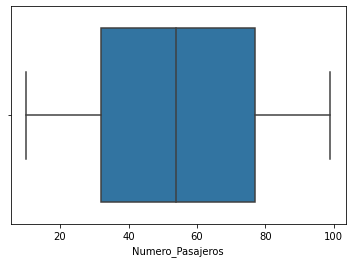

In [14]:
sns.boxplot(x='Numero_Pasajeros', data= df_tp);

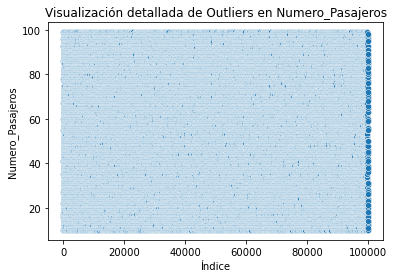

In [15]:
sns.scatterplot(x=df_tp.index, y='Numero_Pasajeros', data=df_tp)
plt.xlabel('Índice')
plt.ylabel('Numero_Pasajeros')
plt.title('Visualización detallada de Outliers en Numero_Pasajeros')
plt.show()

Al comprobar que los valores son muy estables, el % de nulos sobre el total es muy bajo y los datos no se van a ver alterados, decido sustituir los valores nulos de la columna **Número de pasajeros** y **Duración viaje minutos** por la media.

In [16]:
#Sustituir los valores nulos por la media
# Verifico el contenido de la columna antes de la sustitución
print("Contenido de la columna 'Numero_Pasajeros' antes de la sustitución:")
print(df_tp['Numero_Pasajeros'].head())

# Calculo la media de la columna 'minutos'
media_pasajeros = df_tp['Numero_Pasajeros'].astype(float).mean()

# Sustituyo los valores nulos por la media
df_tp['Numero_Pasajeros'].fillna(media_pasajeros, inplace=True)

# Verifico si hay valores nulos restantes
print("\nNúmero de valores nulos en 'Numero_Pasajeros' después de la sustitución:")
print(df_tp['Numero_Pasajeros'].isnull().sum())

# Muestro las primeras filas de la columna después de la sustitución
print("\nContenido de la columna 'Numero_Pasajeros' después de la sustitución:")
print(df_tp['Numero_Pasajeros'].head())

Contenido de la columna 'Numero_Pasajeros' antes de la sustitución:
0     NaN
1    99.0
2    10.0
3    96.0
4    22.0
Name: Numero_Pasajeros, dtype: float64

Número de valores nulos en 'Numero_Pasajeros' después de la sustitución:
0

Contenido de la columna 'Numero_Pasajeros' después de la sustitución:
0    54.465293
1    99.000000
2    10.000000
3    96.000000
4    22.000000
Name: Numero_Pasajeros, dtype: float64


In [17]:
# Verifico el contenido de la columna antes de la gestión
print("Contenido de la columna 'Duracion_Viaje_Minutos' antes de la gestión:")
print(df_tp['Duracion_Viaje_Minutos'].describe())

# Reemplazo 'not_available' con NaN para poder meter la media a los nulos
df_tp['Duracion_Viaje_Minutos'].replace('not_available', np.nan, inplace=True)

# Convierto la columna a tipo numérico
df_tp['Duracion_Viaje_Minutos'] = pd.to_numeric(df_tp['Duracion_Viaje_Minutos'], errors='coerce')

# Calculo la media de la columna 'Duracion_Viaje_Minutos'
media_duracion = df_tp['Duracion_Viaje_Minutos'].mean()

# Sustituyo los valores nulos por la media
df_tp['Duracion_Viaje_Minutos'].fillna(media_duracion, inplace=True)

# Verifico si hay valores nulos restantes
print("\nNúmero de valores nulos en 'Duracion_Viaje_Minutos' después de la gestión:")
print(df_tp['Duracion_Viaje_Minutos'].isnull().sum())

# Muestro las estadísticas de la columna después de la gestión
print("\nContenido de la columna 'Duracion_Viaje_Minutos' después de la gestión:")
print(df_tp['Duracion_Viaje_Minutos'].describe())

Contenido de la columna 'Duracion_Viaje_Minutos' antes de la gestión:
count             99667
unique              706
top       not_available
freq                334
Name: Duracion_Viaje_Minutos, dtype: object

Número de valores nulos en 'Duracion_Viaje_Minutos' después de la gestión:
0

Contenido de la columna 'Duracion_Viaje_Minutos' después de la gestión:
count    100000.000000
mean        366.810275
std         202.578386
min          15.000000
25%         192.000000
50%         366.810275
75%         541.000000
max         719.000000
Name: Duracion_Viaje_Minutos, dtype: float64


He detectado una cosa más, aunque a nivel estadístico no se refleja, en la columna **Retraso Minutos** veo que siempre que es nulo en la columna de pasajeros, el valor es 999 por lo que decido revisarlo y ver cómo lo gestiono.

In [18]:
# Cuento cuántos valores de 999 hay en la columna 'Retraso_Minutos'
cuento_999 = df_tp[df_tp['Retraso_Minutos'] == 999].shape[0]

print(f"Hay {cuento_999} valores de 999 en la columna 'Retraso_Minutos'.")

# Muestro algunas filas que contienen el valor 999 para verificar
print("\nAlgunas filas con el valor 999 en 'Retraso_Minutos':")
print(df_tp[df_tp['Retraso_Minutos'] == 999].head())

Hay 500 valores de 999 en la columna 'Retraso_Minutos'.

Algunas filas con el valor 999 en 'Retraso_Minutos':
     ID_Viaje                Fecha                  Ruta  Numero_Pasajeros  \
0           1  2023-01-01 00:00:00    Barcelona - Bilbao         54.465293   
200       201  2023-01-01 03:20:00    Valencia - Sevilla         54.465293   
400       401  2023-01-01 06:40:00      Malaga - Sevilla         54.465293   
600       601  2023-01-01 10:00:00  Barcelona - Valencia         54.465293   
800       801  2023-01-01 13:20:00       Bilbao - Madrid         54.465293   

     Duracion_Viaje_Minutos  Retraso_Minutos Tipo_Transporte    Region  \
0                366.810275              999         Tranvía   Sevilla   
200              143.000000              999         Tranvía    Malaga   
400              612.000000              999           Metro  Valencia   
600              366.810275              999         Tranvía   Sevilla   
800              209.000000              999       

In [19]:
# Cuento el número de valores de 999 en la columna 'Retraso_Minutos'
cuento_999 = df_tp[df_tp['Retraso_Minutos'] == 999].shape[0]

# Cuento el número total de valores en la columna 'Retraso_Minutos'
total_conteo = df_tp['Retraso_Minutos'].shape[0]

# Calculo el porcentaje de valores 999
porcentaje_999 = (cuento_999 / total_conteo) * 100

print(f"El {porcentaje_999:.2f}% de los valores en la columna 'Retraso_Minutos' son 999.")

El 0.50% de los valores en la columna 'Retraso_Minutos' son 999.


Como el % de nulos es muy bajo y no va a desvirtuar los datos, decido sustituir los 999 por nulo, 
después calcular la media y después sustituir los nulos por la media. no quiero que el dato 999 
altere el resultado de la media.

In [20]:
# Reemplazo los valores 999 por NaN
df_tp['Retraso_Minutos'].replace(999, np.nan, inplace=True)

# Calculo la media de la columna 'Retraso_Minutos' (excluyendo NaNs)
media_retraso = df_tp['Retraso_Minutos'].mean()

# Sustituyo los valores NaN por la media calculada
df_tp['Retraso_Minutos'].fillna(media_retraso, inplace=True)

# Verifico si hay valores nulos restantes
print("Número de valores nulos en 'Retraso_Minutos' después de la sustitución:")
print(df_tp['Retraso_Minutos'].isnull().sum())

# Muestro las estadísticas de la columna después de la gestión
print("\nEstadísticas de la columna 'Retraso_Minutos' después de la gestión:")
print(df_tp['Retraso_Minutos'].describe())

Número de valores nulos en 'Retraso_Minutos' después de la sustitución:
0

Estadísticas de la columna 'Retraso_Minutos' después de la gestión:
count    100000.000000
mean         59.341980
std          34.601469
min           0.000000
25%          29.000000
50%          59.000000
75%          89.000000
max         119.000000
Name: Retraso_Minutos, dtype: float64


Una vez gestionados los duplicados y los nulos, continúo con los tipos de datos ya que he visto que alguno podría ser más útil en otro formato.

In [21]:
# Exploro las columnas y los tipos de datos de nuevo para hacer cambios
df_tp.columns

Index(['ID_Viaje', 'Fecha', 'Ruta', 'Numero_Pasajeros',
       'Duracion_Viaje_Minutos', 'Retraso_Minutos', 'Tipo_Transporte',
       'Region', 'Dia_Semana'],
      dtype='object')

In [22]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100000 non-null  int64  
 1   Fecha                   100000 non-null  object 
 2   Ruta                    100000 non-null  object 
 3   Numero_Pasajeros        100000 non-null  float64
 4   Duracion_Viaje_Minutos  100000 non-null  float64
 5   Retraso_Minutos         100000 non-null  float64
 6   Tipo_Transporte         100000 non-null  object 
 7   Region                  100000 non-null  object 
 8   Dia_Semana              100000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 7.6+ MB


Tras revisarlos, veo oportuno hacer los siguientes cambios:
1. Convertir Fecha a tipo datetime
2. Convertir Numero de Pasajeros, Duración del viaje y Retraso minutos a tipo int

In [23]:
# Convierto la columna 'Fecha' a tipo datetime
df_tp['Fecha'] = pd.to_datetime(df_tp['Fecha'], errors='coerce')

In [24]:
def convertir_columnas_a_int(dataframe, columnas):
    for columna in columnas:
        dataframe[columna] = dataframe[columna].astype(int)
    return dataframe

In [25]:
# Convierto las columnas a tipo int 
columnas_a_convertir = ['Numero_Pasajeros', 'Duracion_Viaje_Minutos', 'Retraso_Minutos']
df_tp = convertir_columnas_a_int(df_tp, columnas_a_convertir)

In [26]:
# Verifico la conversión
print(df_tp.dtypes)

ID_Viaje                           int64
Fecha                     datetime64[ns]
Ruta                              object
Numero_Pasajeros                   int64
Duracion_Viaje_Minutos             int64
Retraso_Minutos                    int64
Tipo_Transporte                   object
Region                            object
Dia_Semana                        object
dtype: object


Una vez gestionados los tipos de datos, me centro en la columna **Dia de la semana** ya que he detectado que los valores están en inglés cuando el resto de información está en español, pensando en ahorrarme un paso en la fase de visualización en power bi, decido mapearlo y cambiarlo.

In [27]:
#Veo la columna de dia de la semana

df_tp['Dia_Semana'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [28]:
# Creo un diccionario de mapeo para traducir los días de la semana a español
mapeo_dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplico el mapeo a la columna 'Dia_Semana'
df_tp['Dia_Semana'] = df_tp['Dia_Semana'].map(mapeo_dias)

Continúo explorando los datos por columnas para ver si empiezo a detectar patrones

In [29]:
df_tp.columns

Index(['ID_Viaje', 'Fecha', 'Ruta', 'Numero_Pasajeros',
       'Duracion_Viaje_Minutos', 'Retraso_Minutos', 'Tipo_Transporte',
       'Region', 'Dia_Semana'],
      dtype='object')

In [30]:
df_tp['Ruta'].value_counts()

Bilbao - Madrid         10191
Madrid - Malaga         10139
Zaragoza - Barcelona    10053
Barcelona - Bilbao      10036
Sevilla - Madrid        10000
Madrid - Zaragoza        9960
Malaga - Sevilla         9938
Barcelona - Valencia     9925
Madrid - Barcelona       9922
Valencia - Sevilla       9836
Name: Ruta, dtype: int64

Intento entender la columna **Region** ya que, de todas las que contiene el dataset, es la única que me genera dudas. Trato de explorarla a fondo utilizando la columna **Ruta** ya que, por naturaleza de los datos, es la que tiene más sentido, pero no encuentro ningún patrón que me indique cómo funciona. Decido aislarla del análisis de momento hasta que pueda hablar con mi cliente y preguntar a cerca de ella y de cómo funciona la recogida de información.

In [31]:
# Intentando entender la columna de Region (comparada con las rutas). Nada coincide, no tiene sentido
df_filtrado = df_tp[df_tp['Ruta'] == 'Barcelona - Valencia']

In [32]:
df_filtrado['Region'].value_counts()

Barcelona    1443
Bilbao       1443
Zaragoza     1431
Valencia     1412
Malaga       1409
Madrid       1395
Sevilla      1392
Name: Region, dtype: int64

Al quedar inutilizada la columna de **Region**, decido crear dos columnas nuevas "ORIGEN" y "DESTINO" a partir de la columna **Ruta** para ver si consigo un dato potente o un patrón que me de información relevante a nivel geográfico en el análisis posterior.

In [33]:
# decido crear dos columnas nuevas de origen y destino para ver si por ciudad se encuentran patrones
# Divido la columna 'Ruta' en dos nuevas columnas 'Origen' y 'Destino'
df_tp[['Origen', 'Destino']] = df_tp['Ruta'].str.split(' - ', expand=True)

In [34]:
df_tp.head()

,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana,Origen,Destino
0,1,2023-01-01 00:00:00,Barcelona - Bilbao,54,366,59,Tranvía,Sevilla,Domingo,Barcelona,Bilbao
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99,192,58,Tren,Barcelona,Domingo,Malaga,Sevilla
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10,94,119,Autobús,Madrid,Domingo,Madrid,Zaragoza
3,4,2023-01-01 00:03:00,Sevilla - Madrid,96,650,2,Metro,Malaga,Domingo,Sevilla,Madrid
4,5,2023-01-01 00:04:00,Madrid - Malaga,22,335,51,Autobús,Sevilla,Domingo,Madrid,Malaga


También decido explorar la columna **Retrasos** ya que, entendiendo que el objetivo de esta investigación es entender patrones para mejorar eficiencias y reducir retrasos, creo que es importante conocerla a fondo para poder exprimir al máximo su contenido. También es importante que esté limpia porque la mayor parte del análisis posterior va a girar en torno a esta columna.

In [35]:
# Valores max y min de los retrasos
max_retraso = df_tp['Retraso_Minutos'].max()
min_retraso = df_tp['Retraso_Minutos'].min()

print("El máximo retraso en minutos es:", max_retraso)
print("El mínimo retraso en minutos es:", min_retraso)


El máximo retraso en minutos es: 119
El mínimo retraso en minutos es: 0


In [36]:
df_tp['Retraso_Minutos'].describe()

count    100000.000000
mean         59.340270
std          34.601477
min           0.000000
25%          29.000000
50%          59.000000
75%          89.000000
max         119.000000
Name: Retraso_Minutos, dtype: float64

In [37]:
df_tp['Retraso_Minutos'].unique()

array([ 59,  58, 119,   2,  51,  68,  21,  91,  76,  67, 115,  63,  30,
        44,  20,  25,  49,  24,  65,  39, 117,  72, 110,  85, 100,  23,
       113,  93,  31,  37,  75,   9,  71,  33, 108,  57,   3,  16,  73,
       116,  36,  92,  17,  22,  62,  42,  74, 105,  81,  32,  90,  54,
        87,  43,  78, 112,  70,  97,  26,  69,   5,  48, 107,  50,  45,
        55, 103,  79,  89,  46,   7,  27, 111,  35,  56,  98,  38,  52,
         1, 118,  84,  80,  64,  96,  95, 104,  10,  47,  14,  86,  15,
       114,  18, 102,  28,  60,  83,  12,  61,   0,  11,  88, 109,  77,
        66, 101,  82,  53,  94,  29,   8,   6,  99,   4,  40,  41,  19,
        13, 106,  34])

Antes de cerrar esta fase, decido explorar la columna de fecha ya que he detectado que tiene pinta de no estar bien recogida la información. Es otra columna que me parece determinante y que quiero comentar con el cliente cómo es el proceso a la hora de registrar los datos ya que, más que fechas, parece una escala que va en aumento (con formato fecha). Aún así decido mantenerla y utilizar los días para conformar meses en el análisis, ya que entiendo que esos datos sí están ok.

In [38]:
# Entendiendo el perído de tiempo analizado Fecha
max_fecha = df_tp['Fecha'].max()
min_fecha = df_tp['Fecha'].min()

print("La fecha más reciente en los datos es:", max_fecha)
print("La fecha más antigua en los datos es:", min_fecha)


La fecha más reciente en los datos es: 2023-03-11 10:39:00
La fecha más antigua en los datos es: 2023-01-01 00:00:00


Una vez explorado, limpiado y transformado, exporto el dataframe a un csv con el que trabajar el análisis de la información.

In [39]:
# Exportar el DataFrame limpio a un archivo CSV para el análisis y las visualizaciones
df_tp.to_csv('Transporte_ok.csv', index=False)